# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [4]:
import sys
sys.path.append('/home/ubuntu/DPRL-Tennis-ML-Agents/python')
# sys.path.append('./python')

In [5]:
from unityagents import UnityEnvironment
import numpy as np

np.float_ = np.float64
np.int_ = np.int64

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [6]:
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64", no_graphics=True)

Found path: /home/ubuntu/DPRL-Tennis-ML-Agents/Tennis_Linux/Tennis.x86_64
Mono path[0] = '/home/ubuntu/DPRL-Tennis-ML-Agents/Tennis_Linux/Tennis_Data/Managed'
Mono config path = '/home/ubuntu/DPRL-Tennis-ML-Agents/Tennis_Linux/Tennis_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	ScreenSelector.so
	libgrpc_csharp_ext.x86.so
	ScreenSelector.so
Logging to /home/ubuntu/.config/unity3d/Unity Technologies/Unity Environment/Player.log


ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continu

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [7]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [8]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [ ]:
# for i in range(1, 6):                                      # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [ ]:
# env.close()

# Configuration Management

This cell defines the configuration management system for the MADDPG tennis environment using a singleton pattern.

## Purpose
The `Config` class serves as a central configuration manager, ensuring consistent settings across all components of the MADDPG system.

## Key Components

### Environment Settings
- `device`: Computing device ('cpu' or 'cuda')
- `seed`: Random seed for reproducibility
- `target_score`: Score threshold for solving environment
- `target_episodes`: Episodes to average score over
- `max_episodes`: Maximum training episodes

### State/Action Space
- `state_size`: Dimension of state space
- `action_size`: Dimension of action space
- `num_agents`: Number of agents in environment

### Network Architecture
- `actor_layers`: Hidden layer sizes for actor network
- `critic_layers`: Hidden layer sizes for critic network
- `actor_lr`: Learning rate for actor network
- `critic_lr`: Learning rate for critic network
- `lr_sched_step`: Steps between learning rate updates
- `lr_sched_gamma`: Learning rate decay factor
- `batch_normalization`: Whether to use batch normalization

### Experience Replay
- `buffer_size`: Size of replay buffer
- `batch_size`: Size of training batches
- `gamma`: Discount factor
- `tau`: Soft update interpolation factor

### Exploration Settings
- `noise`: Whether to add exploration noise
- `noise_theta`: Ornstein-Uhlenbeck noise parameter
- `noise_sigma`: Ornstein-Uhlenbeck noise parameter

## Usage
```python
config = Config()
config.device = 'cuda'  # Set parameters individually
```


In [9]:
class Config:
    def __new__(self):
        """Define this class as a singleton"""
        if not hasattr(self, 'instance'):
            self.instance = super().__new__(self)

            self.instance.device = None
            self.instance.seed = None
            self.instance.target_score = None
            self.instance.target_episodes = None
            self.instance.max_episodes = None

            self.instance.state_size = None
            self.instance.action_size = None
            self.instance.num_agents = None

            self.instance.actor_layers = None
            self.instance.critic_layers = None
            self.instance.actor_lr = None
            self.instance.critic_lr = None
            self.instance.lr_sched_step = None
            self.instance.lr_sched_gamma = None

            self.instance.batch_normalization = None

            self.instance.buffer_size = None
            self.instance.batch_size = None
            self.instance.gamma = None
            self.instance.tau = None

            self.instance.noise = None
            self.instance.noise_theta = None
            self.instance.noise_sigma = None

        return self.instance


# Base Neural Network Implementation

This cell defines the base neural network class used as a foundation for both Actor and Critic networks in the MADDPG system.

## Purpose
The `BaseNN` class provides common functionality for neural network architectures, handling device configuration, initialization, and layer operations.

## Key Components

### Core Functionality
- Device configuration and random seed initialization
- Dynamic layer management using ModuleList
- Standardized parameter initialization

### Methods
- `create_fc_layer`: Creates and initializes fully connected layers
- `reset_parameters`: Initializes weights using uniform distribution [-3e-3, 3e-3]

### Attributes
- `config`: Configuration singleton instance
- `module_list`: Dynamic list storing network layers

## Implementation Details
- Inherits from `torch.nn.Module`
- Uses DDPG-specific weight initialization range
- Supports configurable device placement (CPU/CUDA)

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class BaseNN(nn.Module):
    """Base neural network class for Actor and Critic networks.
    
    This abstract base class provides common functionality for neural network 
    architectures used in the DDPG algorithm. It handles device configuration,
    random seed initialization, and common layer operations.
    
    Attributes:
        config (Config): Singleton configuration instance
        module_list (nn.ModuleList): Dynamic list of network layers
    """
    
    def __init__(self):
        """Initialize the base neural network.
        
        Sets up the network on the specified device, initializes random seed,
        and creates an empty module list for storing layers.
        """
        super(BaseNN, self).__init__()
        self.config = Config()
        self.to(self.config.device)
        torch.manual_seed(self.config.seed)
        self.module_list = nn.ModuleList()

    def create_fc_layer(self, nodes_in: int, nodes_out: int) -> None:
        """Create and initialize a fully connected layer.
        
        Args:
            nodes_in: Number of input features
            nodes_out: Number of output features
        """
        layer = nn.Linear(nodes_in, nodes_out)
        self.reset_parameters(layer)
        self.module_list.append(layer)

    def reset_parameters(self, layer: nn.Linear) -> None:
        """Initialize layer weights using uniform distribution.
        
        Args:
            layer: Linear layer to initialize
            
        Note:
            Uses uniform distribution in range [-3e-3, 3e-3] as per DDPG paper.
        """
        layer.weight.data.uniform_(-3e-3, 3e-3)

# Actor Network Implementation

This cell defines the Actor network component of the DDPG algorithm, which learns the optimal policy for action selection.

## Purpose
The Actor network implements a deterministic policy function that maps states to continuous actions. It serves as the policy network in the DDPG algorithm, learning to select optimal actions directly from state observations.

## Architecture
- **Input Layer**: Accepts state observations (`state_size` dimensions)
- **Hidden Layers**: Configurable via `actor_layers` parameter
- **Output Layer**: Produces action values (`action_size` dimensions)
- **Activations**: 
  - ReLU for hidden layers
  - Tanh for output layer (bounds actions to [-1, 1])

## Key Methods
- `layers_nodes`: Generates layer size pairs for network construction
- `forward`: Implements forward pass through the network

## Implementation Details
- Inherits from `BaseNN` for common neural network functionality
- Uses dynamic layer creation based on configuration
- Ensures bounded action outputs through tanh activation
- Supports batch processing for efficient training

In [ ]:
class Actor(BaseNN):
    """Actor (policy) network that maps states to actions in DDPG.
    
    This network implements the policy function μ(s|θ_μ) which maps states to 
    deterministic actions. It uses ReLU activation for hidden layers and tanh 
    for the output layer to bound actions to [-1, 1].
    
    Inherits from:
        BaseNN: Base neural network class providing common functionality
    
    Architecture:
        - Input layer: state_size neurons
        - Hidden layers: Configured via actor_layers in Config
        - Output layer: action_size neurons with tanh activation
    """
    
    def __init__(self):
        """Initialize the actor network with configured architecture."""
        super(Actor, self).__init__()
        for nodes_in, nodes_out in self.layers_nodes():
            self.create_fc_layer(nodes_in, nodes_out)

    def layers_nodes(self) -> zip:
        """Generate pairs of input/output sizes for network layers.
        
        Returns:
            zip: Iterator of (input_size, output_size) tuples for each layer
        
        Note:
            Layer sizes are determined by:
            - Input: state_size
            - Hidden: actor_layers from config
            - Output: action_size
        """
        nodes = []
        nodes.append(self.config.state_size)
        nodes.extend(self.config.actor_layers)
        nodes.append(self.config.action_size)
        nodes_in = nodes[:-1]
        nodes_out = nodes[1:]
        return zip(nodes_in, nodes_out)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Forward pass through the network.
        
        Args:
            x: Input tensor representing the state
            
        Returns:
            torch.Tensor: Output tensor representing the action, bounded to [-1, 1]
            
        Note:
            Uses ReLU activation for hidden layers and tanh for output layer
            to bound actions to [-1, 1] range.
        """
        for layer in self.module_list[:-1]:
            x = F.relu(layer(x))
        x = self.module_list[-1](x)
        return torch.tanh(x)

# Critic Network Implementation

This cell defines the Critic network component of the DDPG algorithm, which estimates Q-values for state-action pairs.

## Purpose
The Critic network implements the Q-function that estimates expected cumulative rewards. It evaluates the quality of actions in given states, providing value estimates that guide the Actor's policy updates.

## Architecture
- **Input Processing**:
  - State input: `state_size * num_agents` dimensions
  - Action input: `action_size * num_agents` dimensions
  - Actions concatenated after first hidden layer
- **Hidden Layers**: Configurable via `critic_layers` parameter
- **Output**: Single Q-value neuron with sigmoid activation
- **Optional**: Batch normalization after action concatenation

## Key Methods
- `layers_nodes`: Configures network layer dimensions
- `forward`: Processes state-action pairs to produce Q-values

## Implementation Details
- Inherits from `BaseNN` for common functionality
- Supports multi-agent state/action processing
- Uses ReLU activations for hidden layers
- Bounds Q-values to [0, 1] through sigmoid activation

In [ ]:
class Critic(BaseNN):
    """Critic (value) network that maps state-action pairs to Q-values in DDPG.
    
    This network implements the Q-function Q(s,a|θ_Q) which estimates the expected
    cumulative reward for taking an action in a given state. It processes both 
    state and action inputs, with optional batch normalization.
    
    Inherits from:
        BaseNN: Base neural network class providing common functionality
    
    Architecture:
        - Input layer 1: state_size * num_agents neurons (state processing)
        - Input layer 2: action_size * num_agents neurons (action processing)
        - Hidden layers: Configured via critic_layers in Config
        - Output layer: 1 neuron (Q-value) with sigmoid activation
    """
    
    def __init__(self):
        """Initialize the critic network with configured architecture.
        
        If batch normalization is enabled in config, initializes a BatchNorm1d
        layer after the action input concatenation.
        """
        super(Critic, self).__init__()
        for nodes_in, nodes_out in self.layers_nodes():
            self.create_fc_layer(nodes_in, nodes_out)
        if self.config.batch_normalization:
            self.bn = nn.BatchNorm1d(self.module_list[1].in_features)

    def layers_nodes(self) -> zip:
        """Generate pairs of input/output sizes for network layers.
        
        Returns:
            zip: Iterator of (input_size, output_size) tuples for each layer
            
        Note:
            Layer sizes account for:
            - Combined state inputs from all agents
            - Action inputs concatenated after first hidden layer
            - Single Q-value output
        """
        nodes = []
        nodes.append(self.config.state_size * self.config.num_agents)
        nodes.extend(self.config.critic_layers)
        nodes.append(1)
        nodes_in = nodes[:-1]
        # Add action size to second layer's input
        nodes_in[1] += self.config.num_agents * self.config.action_size
        nodes_out = nodes[1:]
        return zip(nodes_in, nodes_out)

    def forward(self, state: torch.Tensor, action: torch.Tensor) -> torch.Tensor:
        """Forward pass through the network.
        
        Args:
            state: Input tensor representing the combined states of all agents
            action: Input tensor representing the combined actions of all agents
            
        Returns:
            torch.Tensor: Output tensor representing the Q-value estimate
            
        Note:
            - First processes state through initial layer
            - Concatenates action input
            - Applies optional batch normalization
            - Processes through remaining layers with ReLU activation
            - Final sigmoid activation bounds output to [0, 1]
        """
        x = F.relu(self.module_list[0](state))
        x = torch.cat((x, action), dim=1)
        if self.config.batch_normalization:
            x = self.bn(x)
        for layer in self.module_list[1:-1]:
            x = F.relu(layer(x))
        x = self.module_list[-1](x)
        return torch.sigmoid(x)

# Deep Deterministic Policy Gradient (DDPG)

## Overview
DDPG is an off-policy actor-critic algorithm designed for continuous action spaces, combining insights from DPG (Deterministic Policy Gradient) and DQN (Deep Q-Network).

## Mathematical Framework

### 1. Actor Network (Policy)
The actor μ(s|θμ) implements a deterministic policy:
```
a = μ(s|θμ)
```
where:
- s is the state
- θμ are the actor network parameters
- a is the deterministic action

### 2. Critic Network (Q-Value)
The critic Q(s,a|θQ) estimates the action-value function:
```
Q(s,a|θQ) ≈ 𝔼[Rt|st=s, at=a]
```
where:
- Rt = Σ γkrt+k is the discounted future reward
- θQ are the critic network parameters

### 3. Learning Updates

#### Critic Update
The critic is updated to minimize the mean squared Bellman error (MSBE):
```
L(θQ) = 𝔼[(Q(s,a|θQ) - y)²]
y = r + γQ(s',μ(s'|θμ')|θQ')
```
where:
- θQ' and θμ' are target network parameters
- γ is the discount factor
- r is the immediate reward

#### Actor Update
The actor is updated using the deterministic policy gradient theorem:
```
∇θμJ ≈ 𝔼[∇aQ(s,a|θQ)|a=μ(s) ∇θμμ(s|θμ)]
```

### 4. Target Networks
Target networks are updated using soft updates:
```
θ' ← τθ + (1-τ)θ'
```
where:
- τ ≪ 1 is the soft update parameter
- θ' represents target network parameters
- θ represents main network parameters

### 5. Exploration
Exploration is achieved using the Ornstein-Uhlenbeck process:
```
dx = θ(μ-x)dt + σdW
```
where:
- θ controls mean reversion strength
- μ is the mean value
- σ scales the noise
- dW is a Wiener process

## Key Features
- Off-policy learning
- Continuous action spaces
- Experience replay for sample efficiency
- Target networks for stability
- Temporally correlated exploration noise

---


# DDPG Agent Implementation

This cell defines the core DDPG agent class that interacts with the environment and manages the learning process.

## Purpose
The `Agent` class implements a Deep Deterministic Policy Gradients (DDPG) agent, managing both actor and critic networks, handling action selection, and coordinating the learning process.

## Key Components

### Networks
- **Actor Networks**:
  - Local network for current policy
  - Target network for stable learning
  - Adam optimizer with learning rate scheduling
  
- **Critic Networks**:
  - Local network for current Q-value estimation
  - Target network for stable learning
  - Adam optimizer with learning rate scheduling

### Methods
- `soft_update`: Gradually updates target networks using τ parameter
- `act`: Selects actions using current policy and optional exploration
- `lr_step`: Updates learning rates using schedulers
- `reset_noise`: Resets exploration noise process

## Implementation Details
- Uses Ornstein-Uhlenbeck noise for exploration
- Implements target networks with soft updates
- Supports learning rate decay through schedulers
- Clips actions to [-1, 1] range
- Handles device placement (CPU/CUDA)

## Note
The agent implements key DDPG features including:
- Experience replay (through buffer)
- Target networks for stability
- Continuous action space handling
- Exploration vs exploitation balance

In [11]:
import copy
import random
import numpy as np
import torch
import torch.optim as optim


class Agent:
    """DDPG agent that interacts with and learns from the environment.
    
    This class implements a Deep Deterministic Policy Gradients (DDPG) agent
    with both actor and critic networks, including their local and target versions.
    It handles action selection, network updates, and exploration noise.
    
    Attributes:
        actor_local (Actor): Local actor network for policy
        actor_target (Actor): Target actor network for stable learning
        actor_optimizer (Adam): Optimizer for actor network
        actor_lr_scheduler (StepLR): Learning rate scheduler for actor
        critic_local (Critic): Local critic network for Q-value estimation
        critic_target (Critic): Target critic network for stable learning
        critic_optimizer (Adam): Optimizer for critic network
        critic_lr_scheduler (StepLR): Learning rate scheduler for critic
        noise (OUNoise): Ornstein-Uhlenbeck noise process for exploration
    """
    
    def __init__(self):
        """Initialize agent with networks, optimizers, and noise process."""
        self.config = Config()
        random.seed(self.config.seed)

        # Initialize and synchronize actor networks
        self.actor_local = Actor()
        self.actor_target = Actor()
        self.actor_target.load_state_dict(self.actor_local.state_dict())
        self.actor_optimizer = optim.Adam(
            self.actor_local.parameters(),
            lr=self.config.actor_lr)
        self.actor_lr_scheduler = optim.lr_scheduler.StepLR(
            self.actor_optimizer,
            step_size=self.config.lr_sched_step,
            gamma=self.config.lr_sched_gamma)

        # Initialize and synchronize critic networks
        self.critic_local = Critic()
        self.critic_target = Critic()
        self.critic_target.load_state_dict(self.critic_local.state_dict())
        self.critic_optimizer = optim.Adam(
            self.critic_local.parameters(),
            lr=self.config.critic_lr)
        self.critic_lr_scheduler = optim.lr_scheduler.StepLR(
            self.critic_optimizer,
            step_size=self.config.lr_sched_step,
            gamma=self.config.lr_sched_gamma)

        self.noise = OUNoise()

    def soft_update(self) -> None:
        """Soft update of target network parameters.
        
        θ_target = τ*θ_local + (1 - τ)*θ_target
        
        Uses the config.tau parameter to interpolate between local and target
        network parameters, providing stable learning.
        """
        tau = self.config.tau
        for target_param, local_param in zip(self.actor_target.parameters(),
                                           self.actor_local.parameters()):
            target_param.data.copy_(
                tau * local_param.data + (1.0 - tau) * target_param.data)
        for target_param, local_param in zip(self.critic_target.parameters(),
                                           self.critic_local.parameters()):
            target_param.data.copy_(
                tau * local_param.data + (1.0 - tau) * target_param.data)

    def act(self, state: np.ndarray) -> np.ndarray:
        """Select an action for the given state using current policy.
        
        Args:
            state: Current state observation
            
        Returns:
            np.ndarray: Selected action, with optional exploration noise
            
        Note:
            Actions are clipped to [-1, 1] range after adding exploration noise.
        """
        with torch.no_grad():
            self.actor_local.eval()
            state = torch.from_numpy(state).float()
            state.to(self.config.device)
            action = self.actor_local(state).data.cpu().numpy()
            self.actor_local.train()

        if self.config.noise:
            action += self.noise.sample()
            np.clip(action, a_min=-1, a_max=1, out=action)

        return action

    def lr_step(self) -> None:
        """Update learning rates according to schedulers."""
        self.actor_lr_scheduler.step()
        self.critic_lr_scheduler.step()

    def reset_noise(self) -> None:
        """Reset the exploration noise process."""
        self.noise.reset()


# Ornstein-Uhlenbeck Noise Implementation

This cell implements the Ornstein-Uhlenbeck noise process used for exploration in continuous action spaces.

## Purpose
The `OUNoise` class generates temporally correlated noise samples that help agents explore continuous action spaces effectively, particularly in physical control tasks where actions should change smoothly over time.

## Key Components

### Parameters
- `mu`: Mean value of the noise process
- `theta`: Mean reversion strength
- `sigma`: Scale of the random noise

### Methods
- `reset`: Resets noise state to initial mean value
- `sample`: Generates next noise sample using OU process

## Mathematical Model
The Ornstein-Uhlenbeck process follows the equation:
```
dx = θ(μ - x)dt + σdW
```
where:
- `θ` controls the strength of mean reversion
- `μ` is the mean value
- `σ` scales the random process
- `dW` is a Wiener process

## Implementation Details
- Configurable through Config singleton
- Maintains state between samples for temporal correlation
- Supports multi-dimensional action spaces
- Uses uniform random sampling for noise generation

## Note
The OU process is particularly suitable for physical control problems as it generates smooth noise that respects the system's inertia.

---

In [ ]:
class OUNoise:
    """Ornstein-Uhlenbeck noise process for exploration in continuous action spaces.
    
    Implements temporally correlated noise using the Ornstein-Uhlenbeck process,
    which is particularly suitable for physical control problems with inertia.
    
    Attributes:
        mu (np.ndarray): Mean value of the process
        state (np.ndarray): Current state of the noise process
    """
    
    def __init__(self, mu: float = 0.):
        """Initialize the noise process.
        
        Args:
            mu: Mean value of the noise process (default: 0.0)
        """
        self.config = Config()
        random.seed(self.config.seed)
        self.mu = mu * np.ones(self.config.action_size)
        self.reset()

    def reset(self) -> None:
        """Reset noise state to initial mean value."""
        self.state = copy.copy(self.mu)

    def sample(self) -> np.ndarray:
        """Generate next noise sample using the OU process.
        
        Returns:
            np.ndarray: Noise sample to add to the action
            
        Note:
            Uses config.noise_theta for mean reversion strength and
            config.noise_sigma for noise scale.
        """
        x = self.state
        random_array = [random.random() for i in range(len(x))]
        dx = self.config.noise_theta * (self.mu - x) \
             + self.config.noise_sigma * np.array(random_array)
        self.state = x + dx
        return self.state

# Experience Replay Buffer Implementation

This cell implements the replay buffer for storing and sampling experiences during MADDPG training.

## Purpose
The `ReplayBuffer` class manages experience storage and retrieval for training, implementing experience replay to improve learning stability and sample efficiency in multi-agent environments.

## Key Components

### Data Structures
- `deque`: Fixed-size double-ended queue for efficient experience storage
- `namedtuple`: Structured storage for individual transitions
- `torch.Tensor`: Batched experience tensors for training

### Methods
- `store`: Adds new experiences to memory
- `sample`: Randomly samples batches of experiences
- `create_tensor`: Creates appropriately shaped tensors for batched data

## Implementation Details
- Supports multi-agent experiences
- Handles batched data with configurable dimensions
- Manages tensor creation with proper shapes:
  - States: `(batch_size, num_agents, state_size)`
  - Actions: `(batch_size, num_agents, action_size)`
  - Rewards: `(batch_size, num_agents)`
- Ensures consistent device placement and data types

## Note
The buffer is essential for:
- Breaking temporal correlations in training data
- Enabling efficient batch processing
- Supporting multi-agent experience sharing

---

In [12]:
import random
from collections import namedtuple, deque
import torch


class ReplayBuffer:
    """Fixed-size buffer to store experience tuples for DDPG training.
    
    This class implements experience replay, storing transitions (state, action, 
    reward, next_state) and enabling random sampling for training. It supports
    multi-agent environments by handling batched experiences.
    
    Attributes:
        memory (deque): Double-ended queue storing experience tuples
        experience (namedtuple): Template for storing single transitions
        config (Config): Configuration singleton instance
    """
    
    def __init__(self):
        """Initialize replay buffer with configured size and random seed."""
        self.config = Config()
        random.seed(self.config.seed)
        self.memory = deque(maxlen=self.config.buffer_size)

        self.experience = namedtuple(
            'Experience',
            field_names=['state', 'actions', 'rewards', 'next_state'])

    def store(self, state: list, actions: list, reward: list, 
              next_state: list) -> None:
        """Add a new experience to memory.
        
        Args:
            state: Current state observation
            actions: Actions taken by agents
            reward: Rewards received
            next_state: Next state observation
        """
        e = self.experience(state, actions, reward, next_state)
        self.memory.append(e)

    def sample(self) -> tuple:
        """Randomly sample a batch of experiences from memory.
        
        Returns:
            tuple: Batch of (states, actions, rewards, next_states) as tensors
            
        Note:
            Returns tensors of shape (batch_size, num_agents, feature_dim)
            where feature_dim varies for different components:
            - states/next_states: state_size
            - actions: action_size
            - rewards: 1
        """
        experiences = random.sample(self.memory, self.config.batch_size)

        states = self.create_tensor(dim=self.config.state_size)
        actions = self.create_tensor(dim=self.config.action_size)
        rewards = self.create_tensor()
        next_states = self.create_tensor(dim=self.config.state_size)
        
        for i, e in enumerate(experiences):
            states[i] = torch.as_tensor(e.state)
            actions[i] = torch.as_tensor(e.actions)
            rewards[i] = torch.as_tensor(e.rewards)
            next_states[i] = torch.as_tensor(e.next_state)
            
        return (states, actions, rewards, next_states)

    def create_tensor(self, dim: int = 0) -> torch.Tensor:
        """Create an empty tensor for storing batched experiences.
        
        Args:
            dim: Feature dimension for the tensor (default: 0 for rewards)
            
        Returns:
            torch.Tensor: Empty tensor of appropriate shape
            
        Note:
            Shape is (batch_size, num_agents, dim) for state/action tensors
            or (batch_size, num_agents) for reward tensors
        """
        batch_size = self.config.batch_size
        num_agents = self.config.num_agents
        
        if dim > 0:
            size = (batch_size, num_agents, dim)
        else:
            size = (batch_size, num_agents)

        tensor = torch.empty(
            size=size, 
            dtype=torch.float,
            device=self.config.device,
            requires_grad=False
        )
        return tensor

    def __len__(self) -> int:
        """Return the current size of internal memory."""
        return len(self.memory)

# Multi-Agent Deep Deterministic Policy Gradient (MADDPG)

## Overview
MADDPG extends DDPG to multi-agent environments using centralized training with decentralized execution. It addresses non-stationarity in multi-agent learning by considering all agents' actions during training.

## Mathematical Framework

### 1. Multi-Agent Setup
For N agents with policies π = {π1, ..., πN}, states s = {s1, ..., sN}, and actions a = {a1, ..., aN}:

### 2. Centralized Critic
Each agent i has a critic that takes all agents' information:
````
Qi(s, a1, ..., aN|θQi) ≈ 𝔼[Rit|s, a1, ..., aN]
````

where:
- Rit is agent i's cumulative discounted reward
- θQi are critic parameters for agent i

### 3. Decentralized Actor
Each agent's actor only uses local observations:
````
μi(si|θμi) → ai
````

where:
- si is agent i's local observation
- θμi are actor parameters for agent i

### 4. Learning Updates

#### Critic Update
For each agent i:
````
L(θQi) = 𝔼[(Qi(s, a1, ..., aN) - yi)²]
yi = ri + γQi'(s', μ1'(s1'), ..., μN'(sN'))
````

#### Actor Update
Policy gradient for agent i:
````
∇θμiJ ≈ 𝔼[∇aiQi(s, a1, ..., aN)|aj=μj(sj) ∇θμiμi(si)]
````

## Key Distinctions from DDPG

### 1. Critic Architecture
- **DDPG**: Q(s, a) for single agent
- **MADDPG**: Qi(s, a1, ..., aN) considers all agents' actions

### 2. Training Process
- **DDPG**: Single agent learning
- **MADDPG**: Concurrent learning with shared information

### 3. Non-stationarity
- **DDPG**: Static environment
- **MADDPG**: Handles changing policies of other agents

### 4. Information Access
- **DDPG**: Full observation during training and execution
- **MADDPG**: 
  - Training: Full observation of all agents
  - Execution: Only local observations

### 5. Policy Updates
- **DDPG**: Independent policy updates
- **MADDPG**: Coordinated updates considering other agents

## Advantages of MADDPG
1. Better handling of non-stationary environments
2. Improved coordination among agents
3. More stable learning in competitive/cooperative scenarios
4. Scalability to multiple agents

## Challenges
1. Increased computational complexity
2. Higher memory requirements
3. Need for careful hyperparameter tuning
4. Potential communication overhead during training

---

In [13]:
import torch
import torch.nn.functional as F


class MultiAgentDDPG:
    """Multi-agent DDPG implementation for coordinated training of multiple agents.
    
    This class manages multiple DDPG agents in a shared environment, handling their
    interactions, training, and synchronization. It implements experience replay
    and coordinated learning updates for all agents.
    
    Attributes:
        agents (list[Agent]): List of DDPG agents
        buffer (ReplayBuffer): Shared experience replay buffer
        config (Config): Configuration singleton instance
    """
    
    def __init__(self):
        """Initialize multi-agent system with configured number of agents."""
        self.config = Config()
        self.agents = [Agent() for _ in range(self.config.num_agents)]
        self.buffer = ReplayBuffer()

    def act(self, state: list) -> list:
        """Get actions from all agents based on their current states.
        
        Args:
            state: List of state observations for each agent
            
        Returns:
            list: Actions chosen by each agent
        """
        actions = [agent.act(obs) for agent, obs in zip(self.agents, state)]
        return actions

    def actions_target(self, states: torch.Tensor) -> torch.Tensor:
        """Get target actions for all agents using their target networks.
        
        Args:
            states: Batch of state observations (batch_size, num_agents, state_size)
            
        Returns:
            torch.Tensor: Target actions (batch_size, num_agents, action_size)
        """
        batch_size = self.config.batch_size
        num_agents = self.config.num_agents
        action_size = self.config.action_size
        
        with torch.no_grad():
            actions = torch.empty(
                (batch_size, num_agents, action_size),
                device=self.config.device)
            for idx, agent in enumerate(self.agents):
                actions[:,idx] = agent.actor_target(states[:,idx])
        return actions

    def actions_local(self, states: torch.Tensor, agent_id: int) -> torch.Tensor:
        """Get local actions for all agents, with gradients only for specified agent.
        
        Args:
            states: Batch of state observations (batch_size, num_agents, state_size)
            agent_id: ID of agent being updated
            
        Returns:
            torch.Tensor: Local actions (batch_size, num_agents, action_size)
        """
        batch_size = self.config.batch_size
        num_agents = self.config.num_agents
        action_size = self.config.action_size

        actions = torch.empty(
            (batch_size, num_agents, action_size),
            device=self.config.device)
        for idx, agent in enumerate(self.agents):
            action = agent.actor_local(states[:,idx])
            if not idx == agent_id:
                action.detach()
            actions[:,idx] = action
        return actions

    def store(self, state: list, actions: list, rewards: list, 
              next_state: list) -> None:
        """Store experience in replay buffer and trigger learning if ready.
        
        Args:
            state: Current state observations
            actions: Actions taken by agents
            rewards: Rewards received
            next_state: Next state observations
        """
        self.buffer.store(state, actions, rewards, next_state)
        if len(self.buffer) >= self.config.batch_size:
            self.learn()

    def learn(self) -> None:
        """Update all agents using shared experiences.
        
        Implements the MADDPG learning algorithm:
        1. Sample shared experiences
        2. For each agent:
            - Update critic using all agents' actions
            - Update actor using policy gradient
        3. Soft update target networks
        """
        batch_size = self.config.batch_size
        for agent_id, agent in enumerate(self.agents):
            # Sample and prepare batch
            states, actions, rewards, next_states = self.buffer.sample()
            obs = states.view(batch_size, -1)
            actions = actions.view(batch_size, -1)
            next_obs = next_states.view(batch_size, -1)
            r = rewards[:,agent_id].unsqueeze_(1)

            # Update critic
            with torch.no_grad():
                next_actions = self.actions_target(next_states)
                next_actions = next_actions.view(batch_size, -1)
                next_q_val = agent.critic_target(next_obs, next_actions)
                y = r + self.config.gamma * next_q_val
            
            agent.critic_optimizer.zero_grad()
            q_value_predicted = agent.critic_local(obs, actions)
            critic_loss = F.mse_loss(q_value_predicted, y)
            critic_loss.backward()
            agent.critic_optimizer.step()

            # Update actor
            agent.actor_optimizer.zero_grad()
            actions_local = self.actions_local(states, agent_id)
            actions_local = actions_local.view(batch_size, -1)
            actor_loss = -agent.critic_local(obs, actions_local).mean()
            actor_loss.backward()
            agent.actor_optimizer.step()

        # Update target networks
        for agent in self.agents:
            agent.soft_update()

    def reset_noise(self) -> None:
        """Reset exploration noise for all agents."""
        for agent in self.agents:
            agent.reset_noise()

    def state_dict(self) -> list:
        """Get state dictionaries of all agents' local actors.
        
        Returns:
            list: State dictionaries for each agent's actor network
        """
        return [agent.actor_local.state_dict() for agent in self.agents]

    def load_state_dict(self, state_dicts: list) -> None:
        """Load saved state dictionaries into agents' local actors.
        
        Args:
            state_dicts: List of state dictionaries for each agent
        """
        for agent, state_dict in zip(self.agents, state_dicts):
            agent.actor_local.load_state_dict(state_dict)

    def lr_step(self) -> None:
        """Update learning rates for all agents."""
        for agent in self.agents:
            agent.lr_step()

# Configuration Initialization

This cell sets up the configuration parameters for the MADDPG training system.

## Environment Settings
- Random seed: 997
- Computing device: CPU
- Target score: 0.5
- Target episodes: 100
- Maximum episodes: 2000

## Network Architecture
- Actor hidden layers: [64, 64]
- Critic hidden layers: [64, 64]
- Batch normalization: Enabled

## Learning Parameters
- Actor learning rate: 3e-3
- Critic learning rate: 4e-4
- Learning rate step size: 1
- Learning rate decay: 0.2
- Discount factor (gamma): 0.99
- Soft update factor (tau): 8e-3

## Experience Replay
- Buffer size: 1,000,000
- Batch size: 64

## Exploration Settings
- Noise enabled: True
- OU noise theta: 0.9
- OU noise sigma: 0.01

## Environment Dimensions
- Number of agents: (from environment)
- Action size: (from environment)
- State size: (from environment)

---

In [14]:
## Initialize values in Config
config = Config()
config.seed = 997
config.device = 'cpu'
config.target_score = 0.5
config.target_episodes = 100

config.num_agents = num_agents
config.action_size = action_size
config.state_size = state_size

config.actor_layers = [64, 64]
config.critic_layers = [64, 64]
config.actor_lr = 3e-3
config.critic_lr = 4e-4
config.lr_sched_step = 1
config.lr_sched_gamma = 0.2
config.batch_normalization = True

config.buffer_size = int(1e6)
config.batch_size = 64
config.gamma = 0.99
config.tau = 8e-3
config.noise = True
config.noise_theta = 0.9
config.noise_sigma = 0.01

config.max_episodes = 2000

# Instantiate a Multi Agent
maddpg = MultiAgentDDPG()


# Training Implementation

This cell implements the main training loop for the MADDPG system.

## Purpose
The `train` function executes the core training process, managing episode execution, performance tracking, and learning rate adjustments.

## Key Components

### Score Tracking
- Maximum scores per episode
- Individual agent scores
- Moving average over target episodes

### Learning Rate Management
- Predefined checkpoints: [0.1, 0.2, 0.4, 0.6]
- Automatic rate reduction at performance thresholds

### Training Process
1. **Episode Initialization**
   - Reset environment and noise
   - Initialize state tracking

2. **Episode Execution**
   - Action selection and execution
   - Experience collection
   - State and reward tracking

3. **Performance Monitoring**
   - Score tracking and averaging
   - Learning rate adjustment
   - Progress reporting

4. **Termination Conditions**
   - Maximum episodes reached
   - Environment solved (target score achieved)

## Implementation Details
- Supports Unity ML-Agents environment
- Handles multi-agent coordination
- Implements adaptive learning rates
- Provides detailed progress tracking

---

In [15]:
def train(env: UnityEnvironment, maddpg: MultiAgentDDPG, 
          max_episodes: int = 5000) -> tuple:
    """Train a Multi-Agent Deep Deterministic Policy Gradients (MADDPG) system.
    
    This function implements the main training loop for the MADDPG algorithm,
    handling episode execution, score tracking, and learning rate scheduling.
    
    Args:
        env: Unity environment for agent interaction
        maddpg: Multi-agent DDPG system to be trained
        max_episodes: Maximum number of training episodes (default: 5000)
        
    Returns:
        tuple: Contains:
            - list: Maximum scores per episode
            - list: Individual agent scores per episode
            - list: Moving average scores
            
    Note:
        Training continues until either:
        1. Maximum episodes reached
        2. Environment solved (moving average >= target_score for target_episodes)
        
        Learning rate is decreased at predefined score checkpoints: [0.1, 0.2, 0.4, 0.6]
    """
    # Initialize score tracking
    scores = []          # Maximum scores per episode
    agents_scores = []   # Individual agent scores
    moving_avg = []      # Moving average of scores
    
    # Set up learning rate adjustment checkpoints
    avg_checkpoints = iter([0.1, 0.2, 0.4, 0.6])
    next_avg_checkpoint = next(avg_checkpoints)
    
    # Main training loop
    for i_episode in range(1, max_episodes + 1):
        # Reset environment and noise for new episode
        maddpg.reset_noise()
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        scores_episode = np.zeros(config.num_agents)
        
        # Episode execution loop
        while True:
            # Execute environment step
            actions = maddpg.act(state)
            env_info = env.step(actions)[brain_name]
            
            # Collect step information
            rewards = env_info.rewards
            next_state = env_info.vector_observations
            
            # Store experience and update state/scores
            maddpg.store(state, actions, rewards, next_state)
            state = next_state
            scores_episode += rewards
            
            if any(env_info.local_done):
                break
        
        # Update tracking metrics
        agents_scores.append(scores_episode)
        scores.append(scores_episode.max())
        moving_avg.append(np.mean(scores[-config.target_episodes:]))
        
        # Check for learning rate adjustment
        if moving_avg[-1] >= next_avg_checkpoint:
            print('\nDecreasing learning rate ...')
            maddpg.lr_step()
            try:
                next_avg_checkpoint = next(avg_checkpoints)
            except StopIteration:
                pass
        
        # Print progress
        print('\rEpisode {:4d}\t'
              'Last score: {:5.2f} ({:5.2f} / {:5.2f})\t'
              'Moving average: {:5.3f}'
              .format(i_episode,
                     scores[-1], scores_episode[0], scores_episode[1],
                     moving_avg[-1]),
              end='')
        
        if i_episode % 100 == 0:
            print()
        
        # Check if environment is solved
        if (moving_avg[-1].mean() >= config.target_score and 
            i_episode >= config.target_episodes):
            print('\n\nEnvironment solved in {:d} episodes!\t'
                  'Moving Average Score: {:.3f}'
                  .format(i_episode - config.target_episodes, moving_avg[-1]))
            break
    
    print('\n')
    return scores, agents_scores, moving_avg

# Training Execution

This cell initiates the MADDPG training process, configures matplotlib for inline plotting, and executes the main training loop with the specified configuration parameters. The training progress and final results are stored in variables tracking overall scores, individual agent performances, and moving averages.

---

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

# Train the agent
print('Starting training phase using these settings:')
print("\n '".join(str(config.__dict__).split(", '")), '\n')

scores, agents_scores, moving_avg = train(env, maddpg, config.max_episodes)

Starting training phase using these settings:
{'device': 'cpu'
 'seed': 997
 'target_score': 0.5
 'target_episodes': 100
 'max_episodes': 2000
 'state_size': 24
 'action_size': 2
 'num_agents': 2
 'actor_layers': [64, 64]
 'critic_layers': [64, 64]
 'actor_lr': 0.003
 'critic_lr': 0.0004
 'lr_sched_step': 1
 'lr_sched_gamma': 0.2
 'batch_normalization': True
 'buffer_size': 1000000
 'batch_size': 64
 'gamma': 0.99
 'tau': 0.008
 'noise': True
 'noise_theta': 0.9
 'noise_sigma': 0.01} 

Episode    4	Last score:  0.00 ( 0.00 / -0.01)	Moving average: 0.000

/tmp/ipykernel_16178/3764202112.py:34: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647327489/work/torch/csrc/utils/tensor_new.cpp:278.)
  actions[i] = torch.as_tensor(e.actions)
E1117 06:11:37.305590930   16178 fork_posix.cc:76]           Other threads are currently calling into gRPC, skipping fork() handlers
E1117 06:11:37.333197429   16178 fork_posix.cc:76]           Other threads are currently calling into gRPC, skipping fork() handlers
E1117 06:11:37.352488807   16178 fork_posix.cc:76]           Other threads are currently calling into gRPC, skipping fork() handlers
E1117 06:11:37.370980215   16178 fork_posix.cc:76]           Other threads are currently calling into gRPC, skipping fork() handlers
E1117 06:11:37.391092950   16178 fork_posix.cc:76]           Other threads are curre

Episode  100	Last score:  0.00 (-0.01 /  0.00)	Moving average: 0.007
Episode  200	Last score:  0.00 ( 0.00 / -0.01)	Moving average: 0.006
Episode  300	Last score:  0.10 ( 0.10 / -0.01)	Moving average: 0.030
Episode  400	Last score:  0.00 (-0.01 /  0.00)	Moving average: 0.060
Episode  500	Last score:  0.00 (-0.01 /  0.00)	Moving average: 0.063
Episode  600	Last score:  0.20 ( 0.09 /  0.20)	Moving average: 0.092
Episode  700	Last score:  0.00 ( 0.00 / -0.01)	Moving average: 0.077
Episode  800	Last score:  0.10 ( 0.10 / -0.01)	Moving average: 0.074
Episode  900	Last score:  0.10 ( 0.10 / -0.01)	Moving average: 0.091
Episode  935	Last score:  0.10 ( 0.09 /  0.10)	Moving average: 0.098
Decreasing learning rate ...
Episode 1000	Last score:  0.20 ( 0.19 /  0.20)	Moving average: 0.123
Episode 1100	Last score:  0.09 ( 0.09 /  0.00)	Moving average: 0.140
Episode 1200	Last score:  0.10 ( 0.10 /  0.09)	Moving average: 0.124
Episode 1300	Last score:  0.10 ( 0.10 /  0.09)	Moving average: 0.116
Episo

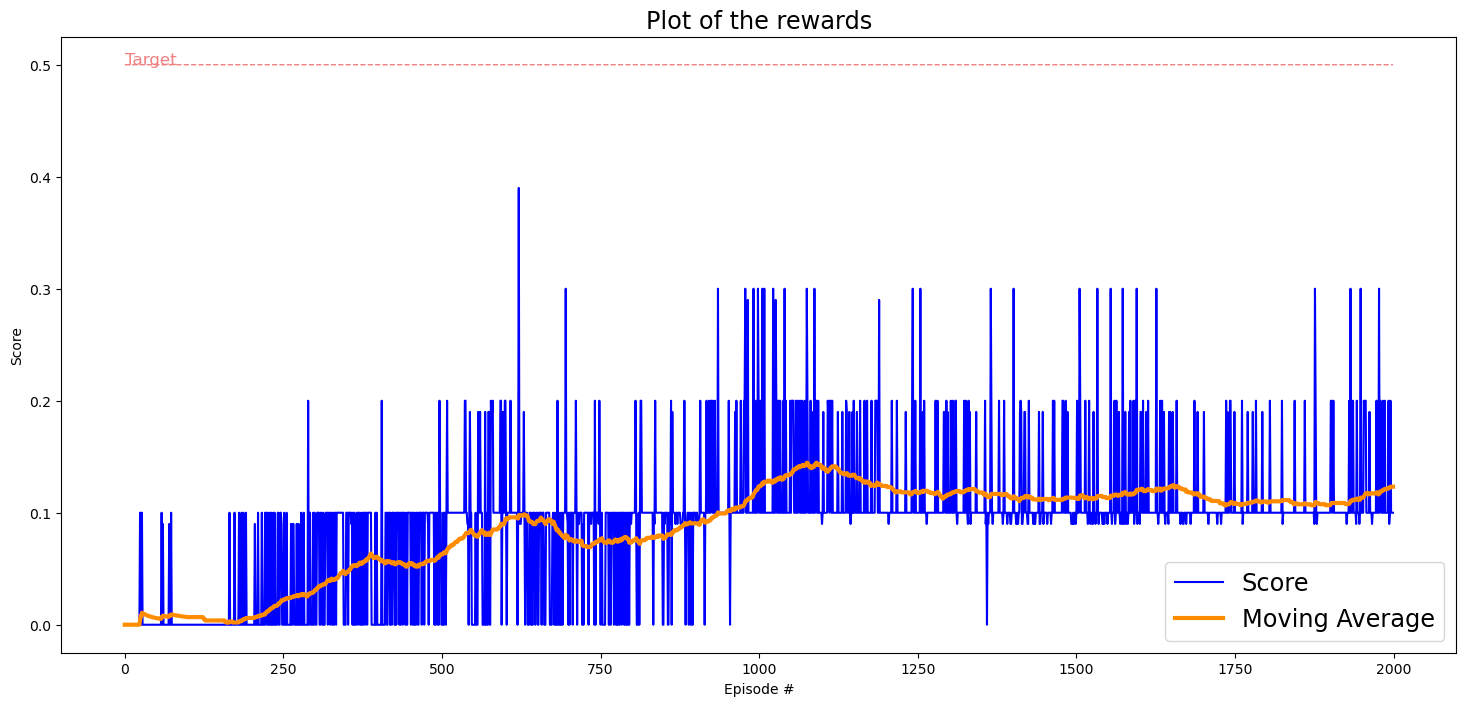

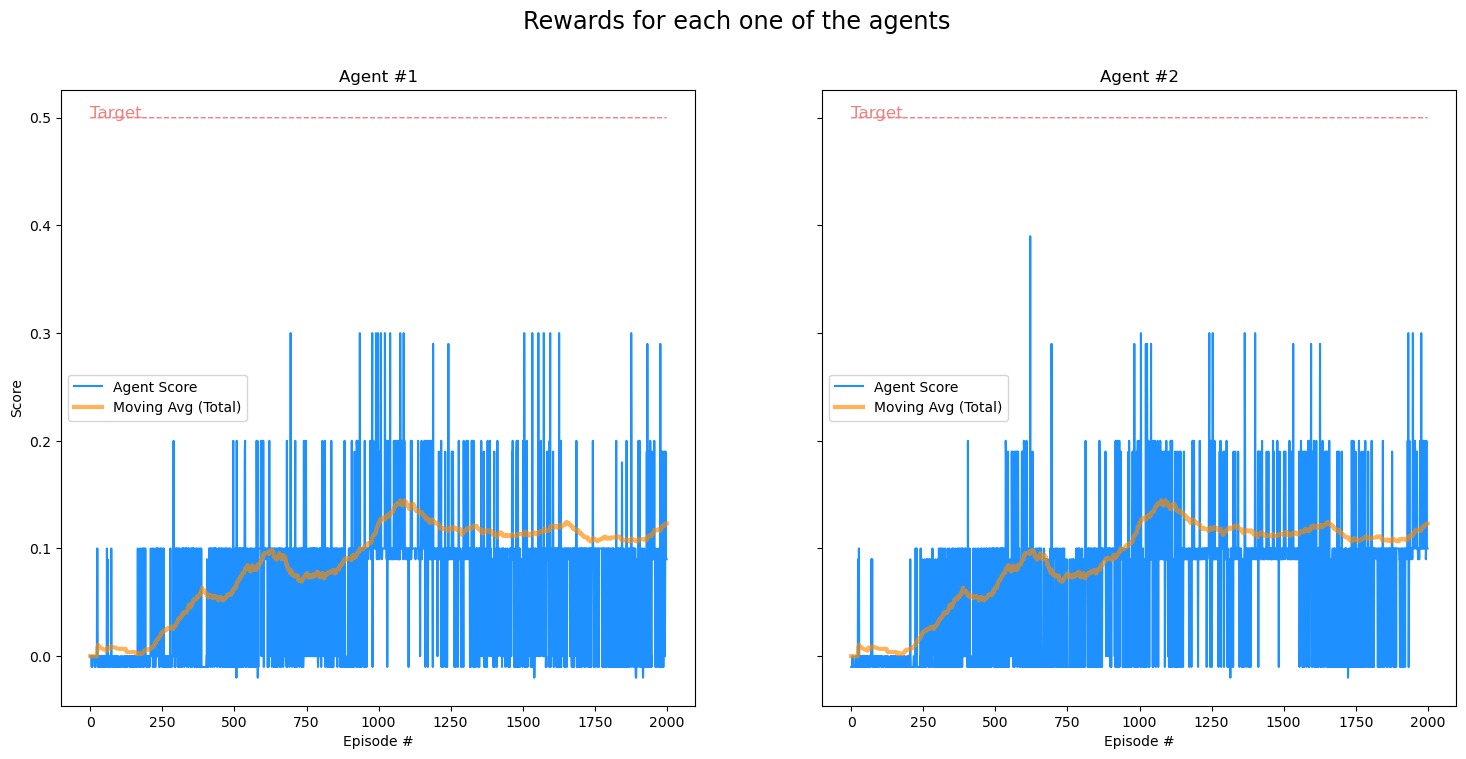

In [18]:
## Plot graphic of rewards

# Trace a line indicating the target value
target = [config.target_score] * len(scores)

# Graphic with the total rewards
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
ax.set_title('Plot of the rewards', fontsize='xx-large')
ax.plot(scores, label='Score', color='Blue')
ax.plot(moving_avg, label='Moving Average',
        color='DarkOrange', linewidth=3)
ax.plot(target, linestyle='--', color='LightCoral', linewidth=1 )
ax.text(0, config.target_score, 'Target', color='LightCoral', fontsize='large')
ax.set_ylabel('Score')
ax.set_xlabel('Episode #')
ax.legend(fontsize='xx-large')
plt.show()

# Graphics for each one of the agents
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)
fig.suptitle('Rewards for each one of the agents', fontsize='xx-large')
axs = axs.flatten()
for idx, (ax, s) in enumerate(zip(axs, np.transpose(agents_scores))):
    ax.plot(s, label='Agent Score', color='DodgerBlue', zorder=1)
    ax.plot(moving_avg, label='Moving Avg (Total)',
            color='DarkOrange', linewidth=3, alpha=0.655, zorder=2)
    ax.plot(target, linestyle='--', color='LightCoral', linewidth=1, zorder=0)
    ax.text(0, config.target_score, 'Target',
            color='LightCoral', fontsize='large')
    ax.set_title('Agent #%d' % (idx+1))
    ax.set_ylabel('Score')
    ax.set_xlabel('Episode #')
    ax.label_outer()
    ax.legend(fontsize='medium')

plt.show()

In [19]:
checkpoint = {
    'maddpg_state_dict': maddpg.state_dict(),
    'scores': scores,
    'agents_scores': agents_scores,
    'moving_avg': moving_avg}
torch.save(checkpoint, 'checkpoint.pt')

# Testing Implementation

This cell implements the evaluation process for the trained MADDPG system.

## Purpose
The `test` function evaluates the performance of trained agents in the environment without exploration noise, providing a clear assessment of the learned policies.

## Key Components

### Test Configuration
- Disables training mode in environment
- Turns off exploration noise
- Loads pretrained model weights

### Evaluation Process
1. **Episode Setup**
   - Reset environment
   - Initialize score tracking

2. **Episode Execution**
   - Get agent observations
   - Select deterministic actions
   - Execute environment steps
   - Track rewards

3. **Performance Reporting**
   - Maximum score across agents
   - Individual agent scores
   - Episode-by-episode results

## Implementation Details
- Uses saved checkpoint for model weights
- Runs specified number of test episodes
- Provides detailed performance metrics
- Maintains original environment structure

---

In [ ]:
def test(env: UnityEnvironment, maddpg: MultiAgentDDPG, 
         max_episodes: int = 3) -> None:
    """Test a trained MADDPG system in the environment.
    
    This function runs the trained agents in evaluation mode (no exploration noise)
    for a specified number of episodes and reports their performance.
    
    Args:
        env: Unity environment for agent interaction
        maddpg: Trained multi-agent DDPG system
        max_episodes: Number of test episodes to run (default: 3)
        
    Note:
        - Training mode is disabled during testing
        - Scores are reported for each agent and the maximum score
        - Episodes run until completion (local_done signal)
    """
    for i_episode in range(1, max_episodes + 1):
        # Reset environment for new episode
        env_info = env.reset(train_mode=False)[brain_name]
        scores = np.zeros(config.num_agents)
        
        # Episode execution loop
        while True:
            # Get actions from agents and execute step
            states = env_info.vector_observations
            actions = maddpg.act(states)
            env_info = env.step(actions)[brain_name]
            
            # Update scores and check for episode end
            scores += env_info.rewards
            states = env_info.vector_observations
            if any(env_info.local_done):
                break
                
        # Report episode results
        print('\rEpisode {:4d}\tScore: {:5.2f} ({:5.2f} / {:5.2f})'
              .format(i_episode, scores.max(), scores[0], scores[1]))


# Load trained model and configure for testing
checkpoint = torch.load('checkpoint.pt')
config.noise = False  # Disable exploration noise for testing
maddpg = MultiAgentDDPG()
maddpg.load_state_dict(checkpoint['maddpg_state_dict'])

# Run test episodes
test(env, maddpg)

In [ ]:
env.close()